In [7]:
import tensorflow as tf
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


np.random.seed(0)
tf.random.set_seed(0)

df = pd.read_csv('InData_0729_1505.csv', names = ['senser_f1','senser_f2','senser_f3','senser_r','senser_l','senser_b',
                                                  'speed_l', 'speed_r', 'direction'])
df = pd.DataFrame(df)
df

,senser_f1,senser_f2,senser_f3,senser_r,senser_l,senser_b,speed_l,speed_r,direction
0,5,4,6,21,3,5,300,300,2
1,5,4,6,21,3,5,300,300,2
2,5,4,6,20,3,5,300,300,2
3,5,4,6,20,3,5,300,300,2
4,5,4,6,20,3,5,300,300,2
...,...,...,...,...,...,...,...,...,...
6262,2,2,7,18,16,2,300,300,1
6263,2,2,6,19,16,2,300,300,1
6264,2,2,4,20,16,2,300,300,1
6265,2,2,3,20,16,2,300,300,1


In [14]:
dataset = df.values
x = dataset[:,:-3]
y = dataset[:,-3:]
y = dataset[:,-3]+dataset[:,-2]+dataset[:,-1]
y2 = []
for i in y:
    if i == 601:
        i = 1
        y2.append(i)
    elif i ==602:
        i = 2
        y2.append(i)
    elif i ==603:
        i = 3
        y2.append(i)
    elif i ==-599:
        i = 4
        y2.append(i)
    elif i ==-598:
        i = 5
        y2.append(i)
    elif i ==-597:
        i = 6
        y2.append(i)
y2  

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [15]:
e = LabelEncoder()
y = e.fit_transform(y2)
y = tf.keras.utils.to_categorical(y)
y

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)


Epoch 00001: val_loss improved from inf to 1.48869, saving model to ./model\01-1.4887-0.3267.hdf5

Epoch 00002: val_loss improved from 1.48869 to 1.07139, saving model to ./model\02-1.0714-0.6595.hdf5

Epoch 00003: val_loss improved from 1.07139 to 0.91150, saving model to ./model\03-0.9115-0.6761.hdf5

Epoch 00004: val_loss improved from 0.91150 to 0.83676, saving model to ./model\04-0.8368-0.7148.hdf5

Epoch 00005: val_loss improved from 0.83676 to 0.78919, saving model to ./model\05-0.7892-0.7155.hdf5

Epoch 00006: val_loss improved from 0.78919 to 0.76357, saving model to ./model\06-0.7636-0.7341.hdf5

Epoch 00007: val_loss improved from 0.76357 to 0.75469, saving model to ./model\07-0.7547-0.7383.hdf5

Epoch 00008: val_loss improved from 0.75469 to 0.74650, saving model to ./model\08-0.7465-0.7390.hdf5

Epoch 00009: val_loss improved from 0.74650 to 0.73810, saving model to ./model\09-0.7381-0.7403.hdf5

Epoch 00010: val_loss improved from 0.73810 to 0.72878, saving model to ./mo


Epoch 00124: val_loss did not improve from 0.63991

Epoch 00125: val_loss did not improve from 0.63991

Epoch 00126: val_loss did not improve from 0.63991

Epoch 00127: val_loss did not improve from 0.63991

Epoch 00128: val_loss did not improve from 0.63991

Epoch 00129: val_loss did not improve from 0.63991

Epoch 00130: val_loss did not improve from 0.63991

Epoch 00131: val_loss did not improve from 0.63991

Epoch 00132: val_loss improved from 0.63991 to 0.63913, saving model to ./model\132-0.6391-0.7707.hdf5

Epoch 00133: val_loss did not improve from 0.63913

Epoch 00134: val_loss did not improve from 0.63913

Epoch 00135: val_loss did not improve from 0.63913

Epoch 00136: val_loss improved from 0.63913 to 0.63903, saving model to ./model\136-0.6390-0.7666.hdf5

Epoch 00137: val_loss did not improve from 0.63903

Epoch 00138: val_loss did not improve from 0.63903

Epoch 00139: val_loss did not improve from 0.63903

Epoch 00140: val_loss did not improve from 0.63903

Epoch 00141

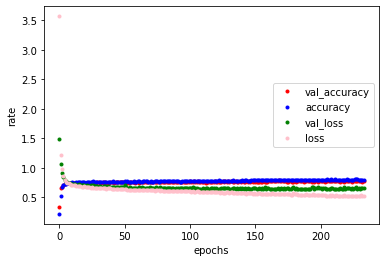

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

model = Sequential()
model.add(Dense(50, input_dim=6, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='softmax'))

# 모델 학습과정 설정 
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

# 자동중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

#모델저장조건 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1,save_best_only = True)

#모델실행시 validation_split을 위해 데이터의 일부를 자동으로 예약 할 데이터의 비율을 나타내므로 0보다 크고 1보다 작은수로 설정
history = model.fit(x_train, y_train, validation_split=0.33, epochs=2000, batch_size=100, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

print("%.4f : %.4f" %(model.evaluate(x_train,y_train)[1], model.evaluate(x_test,y_test)[1]))

#테스트셋으로 실험 오차값 저장
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

#학습셋으로 정확도 값 저장
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

#x값을 지저앟고 정확도를 파란색, 오차를 빨간색
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, "o", c="red", markersize=3, label='val_accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label='accuracy')
plt.plot(x_len, y_vloss, "o", c="green", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="pink", markersize=3, label='loss')
plt.legend(loc='right')
plt.xlabel('epochs')
plt.ylabel('rate')

plt.show()

In [51]:
predictions = model.predict(x_test)
y_pred = [np.argmax(y, axis=None) for y in predictions]
pred =[]
for i in y_pred :
    if i == 0:
        pred.append("전진 / 조향 : R")
    elif i == 1:
        pred.append("전진 / 조향 : 0")
    elif i == 2:
        pred.append("전진 / 조향 : L")
    elif i == 3:
        pred.append("후진 / 조향 : R")
    elif i == 4:
        pred.append("후진 / 조향 : 0")
    elif i == 5:
        pred.append("후진 / 조향 : L")
pred

['전진 / 조향 : R',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : L',
 '전진 / 조향 : 0',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : 0',
 '후진 / 조향 : L',
 '전진 / 조향 : R',
 '전진 / 조향 : L',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : 0',
 '전진 / 조향 : 0',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '후진 / 조향 : L',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : 0',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : L',
 '전진 / 조향 : L',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : 0',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조향 : R',
 '전진 / 조